In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ibadeus/pcos-xai-ultrasound-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ibadeus/pcos-xai-ultrasound-dataset/versions/1


In [4]:
import os
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ibadeus/pcos-xai-ultrasound-dataset")
print("📁 Downloaded to:", path)

# Print out folder contents
for root, dirs, files in os.walk(path):
    print("📂", root)
    for d in dirs:
        print("   └── 🗂️", d)
    for f in files[:5]:  # show first 5 files
        print("   └── 📄", f)
    print()


📁 Downloaded to: /kaggle/input/pcos-xai-ultrasound-dataset
📂 /kaggle/input/pcos-xai-ultrasound-dataset
   └── 🗂️ PCOS

📂 /kaggle/input/pcos-xai-ultrasound-dataset/PCOS
   └── 🗂️ infected
   └── 🗂️ noninfected

📂 /kaggle/input/pcos-xai-ultrasound-dataset/PCOS/infected
   └── 📄 image10876.jpg
   └── 📄 Image_747.jpg
   └── 📄 Image_561.jpg
   └── 📄 Image_Rotate_341.jpg
   └── 📄 image11858.jpg

📂 /kaggle/input/pcos-xai-ultrasound-dataset/PCOS/noninfected
   └── 📄 Image_SetB134.jpg
   └── 📄 Image_resize_485.jpg
   └── 📄 Image_747.jpg
   └── 📄 Image_561.jpg
   └── 📄 Image_SetB798.jpg



In [5]:
import os
import pandas as pd

# Correct base path
base_path = "/kaggle/input/pcos-xai-ultrasound-dataset/PCOS"
categories = ["infected", "noninfected"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)

    for img in os.listdir(category_path):
        if img.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(category_path, img))
            labels.append(category)

# Create DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

# Show basic info
print("\n✅ Sample Images:")
print(df.head())

print("\n📊 Summary:")
print("Total Images:", len(df))
print("Images per Class:\n", df['label'].value_counts())
print("Duplicates:", df.duplicated().sum())
print("Missing Values:\n", df.isnull().sum())



✅ Sample Images:
                                          image_path     label
0  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
1  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
2  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
3  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
4  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected

📊 Summary:
Total Images: 11784
Images per Class:
 label
infected       6784
noninfected    5000
Name: count, dtype: int64
Duplicates: 0
Missing Values:
 image_path    0
label         0
dtype: int64


In [6]:
print(df.head())

                                          image_path     label
0  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
1  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
2  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
3  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected
4  /kaggle/input/pcos-xai-ultrasound-dataset/PCOS...  infected


In [7]:
df.tail()

,image_path,label
11779,/kaggle/input/pcos-xai-ultrasound-dataset/PCOS...,noninfected
11780,/kaggle/input/pcos-xai-ultrasound-dataset/PCOS...,noninfected
11781,/kaggle/input/pcos-xai-ultrasound-dataset/PCOS...,noninfected
11782,/kaggle/input/pcos-xai-ultrasound-dataset/PCOS...,noninfected
11783,/kaggle/input/pcos-xai-ultrasound-dataset/PCOS...,noninfected


/tmp/ipython-input-8-1538966346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis', ax=ax)


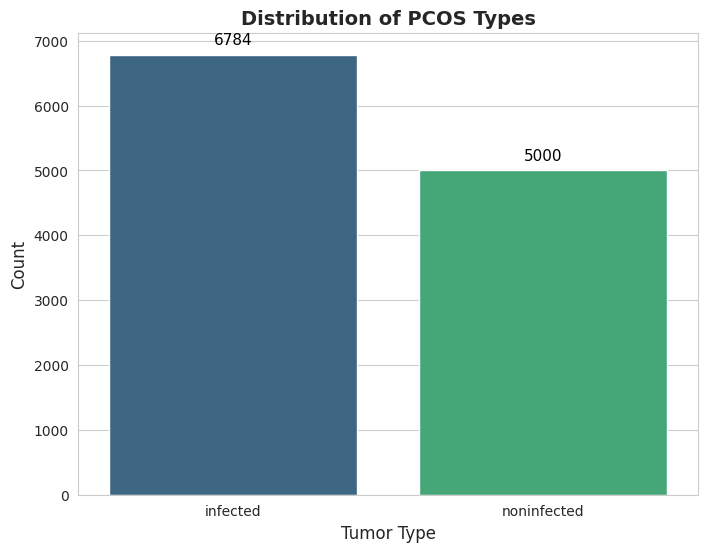

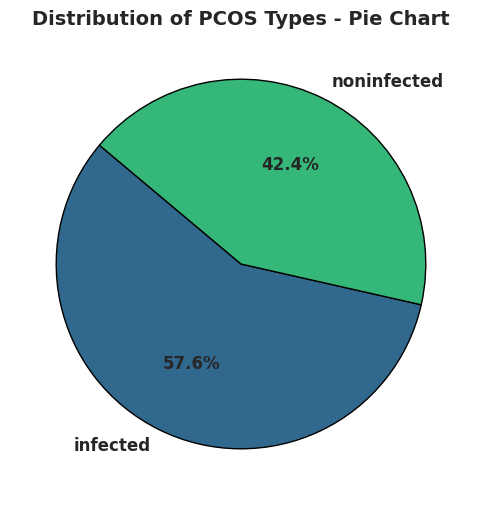

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use whitegrid style for better visuals
sns.set_style('whitegrid')

# ----------- Bar Plot: Distribution of PCOS Types -------------
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='viridis', ax=ax)

ax.set_title("Distribution of PCOS Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.show()

# ----------- Pie Chart: Distribution of PCOS Types -------------
label_counts = df['label'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

ax.set_title("Distribution of PCOS Types - Pie Chart", fontsize=14, fontweight='bold')
plt.show()


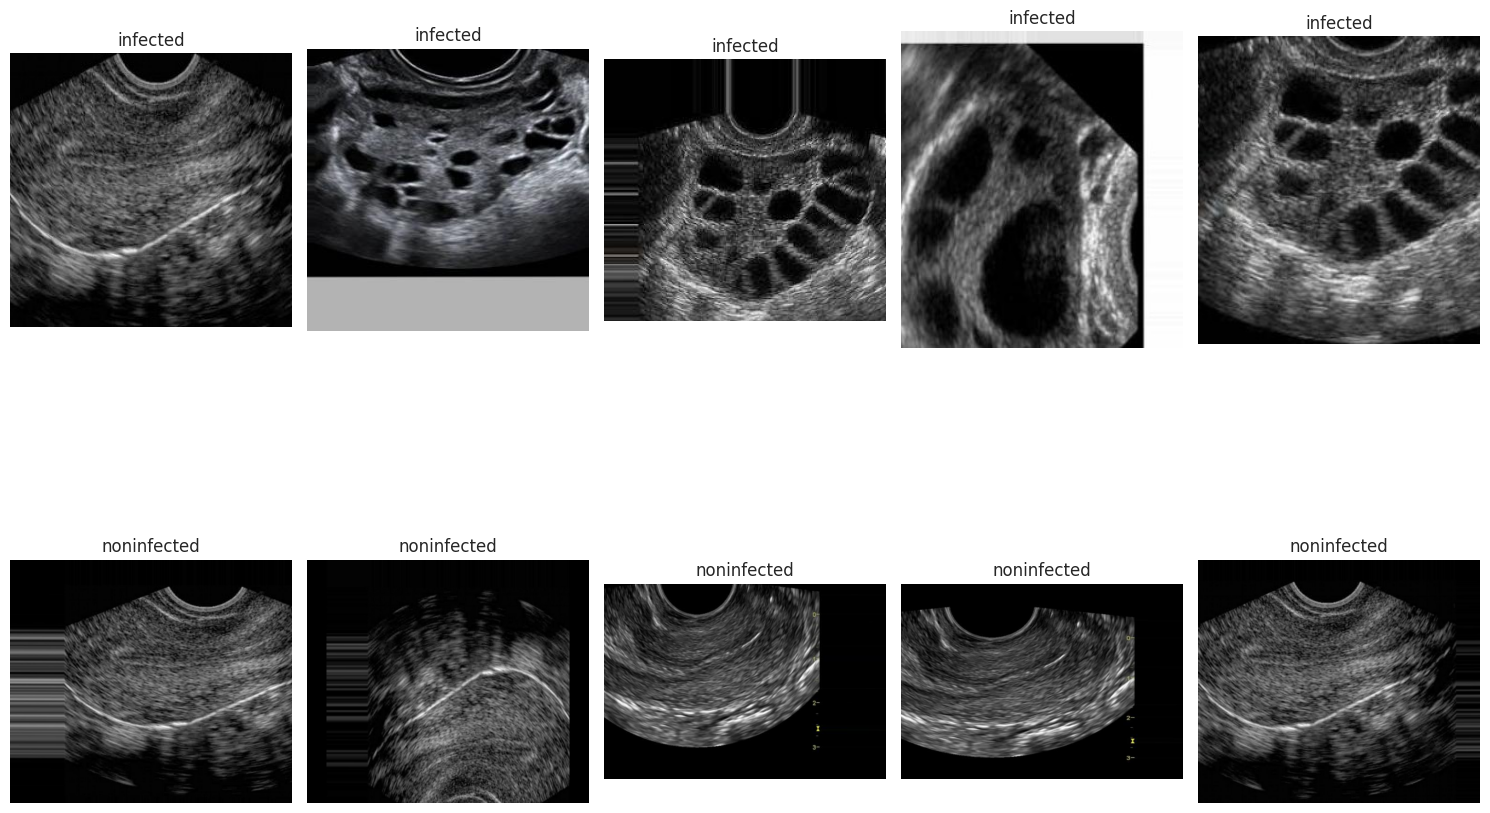

In [9]:
import cv2
import matplotlib.pyplot as plt

num_images = 5  # images per class

plt.figure(figsize=(15, 6 * len(categories)))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{category}", fontsize=12)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# 1. Encode Labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])

# Show mapping
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 2. Upsample to balance classes
max_count = df['category_encoded'].value_counts().max()
dfs = []

for category in df['category_encoded'].unique():
    class_subset = df[df['category_encoded'] == category]
    class_upsampled = resample(class_subset, replace=True, n_samples=max_count, random_state=42)
    dfs.append(class_upsampled)

# 3. Concatenate & Shuffle
df_balanced = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# 4. Convert labels to string (needed for ImageDataGenerator)
df_balanced['category_encoded'] = df_balanced['category_encoded'].astype(str)

# 5. Confirm it's balanced
print("\n✅ Balanced class counts:")
print(df_balanced['category_encoded'].value_counts())


Label mapping: {'infected': np.int64(0), 'noninfected': np.int64(1)}

✅ Balanced class counts:
category_encoded
0    6784
1    6784
Name: count, dtype: int64


In [11]:
import time
import shutil
import pathlib
import itertools
import warnings
warnings.filterwarnings("ignore")

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

sns.set_style('darkgrid')

print("✅ Setup complete!")


✅ Setup complete!


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df_resampled = df_balanced.copy()
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)


# Split the data: train 80%, valid 10%, test 10%
train_df_new, temp_df_new = train_test_split(
    df_resampled, train_size=0.8, shuffle=True, stratify=df_resampled['category_encoded'], random_state=42)

valid_df_new, test_df_new = train_test_split(
    temp_df_new, test_size=0.5, shuffle=True, stratify=temp_df_new['category_encoded'], random_state=42)

# Data augmentation and normalization
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen_new = train_datagen.flow_from_dataframe(
    train_df_new, x_col='image_path', y_col='category_encoded',
    target_size=img_size, class_mode='binary', color_mode='rgb',
    batch_size=batch_size, shuffle=True)

valid_gen_new = val_test_datagen.flow_from_dataframe(
    valid_df_new, x_col='image_path', y_col='category_encoded',
    target_size=img_size, class_mode='binary', color_mode='rgb',
    batch_size=batch_size, shuffle=True)

test_gen_new = val_test_datagen.flow_from_dataframe(
    test_df_new, x_col='image_path', y_col='category_encoded',
    target_size=img_size, class_mode='binary', color_mode='rgb',
    batch_size=batch_size, shuffle=False)


Found 10854 validated image filenames belonging to 2 classes.
Found 1357 validated image filenames belonging to 2 classes.
Found 1357 validated image filenames belonging to 2 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, MultiHeadAttention, Concatenate, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Check GPUs
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth set")
    except RuntimeError as e:
        print(e)

# Define image shape & number of classes
img_size = (224, 224)
channels = 3
img_shape = (224, 224, 3)
num_classes = len(train_df_new['category_encoded'].unique())

# Split image: upper half and lower half
def split_image(image):
    upper_half = image[:, :img_size[0]//2, :, :]
    lower_half = image[:, img_size[0]//2:, :, :]
    return upper_half, lower_half

# Flip lower half horizontally
def flip_lower_half(lower_half):
    return tf.image.flip_left_right(lower_half)


Num GPUs Available: 1
✅ GPU memory growth set


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, MultiHeadAttention, Concatenate, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Image config
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
num_classes = len(df_resampled['category_encoded'].unique())

# ---------------------
# 🧠 Custom Split Logic
# ---------------------

# Split image into upper and lower halves
def split_image(image):
    upper_half = image[:, :img_size[0]//2, :, :]
    lower_half = image[:, img_size[0]//2:, :, :]
    return upper_half, lower_half

# Flip lower half horizontally
def flip_lower_half(image):
    return tf.image.flip_left_right(image)

# ---------------------
# 🧠 Model Architecture
# ---------------------

# Input Layer
input_layer = Input(shape=img_shape)

# Split upper and lower halves
upper_half, lower_half = Lambda(split_image)(input_layer)

# Flip lower half
lower_half_flipped = Lambda(flip_lower_half)(lower_half)

# ---------------------
# 👁️ Upper Half Branch
# ---------------------
upper_conv = Conv2D(32, (3,3), activation='relu', padding='same')(upper_half)
upper_conv = MaxPooling2D((2,2))(upper_conv)
upper_conv = Conv2D(64, (3,3), activation='relu', padding='same')(upper_conv)
upper_conv = MaxPooling2D((2,2))(upper_conv)
upper_conv = Conv2D(128, (3,3), activation='relu', padding='same')(upper_conv)
upper_conv = MaxPooling2D((2,2))(upper_conv)
upper_flat = Flatten()(upper_conv)
upper_dense = Dense(512, activation='relu')(upper_flat)
upper_reshaped = Reshape((1, 512))(upper_dense)

# ---------------------
# 👁️ Lower Half Branch
# ---------------------
lower_conv = Conv2D(32, (3,3), activation='relu', padding='same')(lower_half_flipped)
lower_conv = MaxPooling2D((2,2))(lower_conv)
lower_conv = Conv2D(64, (3,3), activation='relu', padding='same')(lower_conv)
lower_conv = MaxPooling2D((2,2))(lower_conv)
lower_conv = Conv2D(128, (3,3), activation='relu', padding='same')(lower_conv)
lower_conv = MaxPooling2D((2,2))(lower_conv)
lower_flat = Flatten()(lower_conv)
lower_dense = Dense(512, activation='relu')(lower_flat)
lower_reshaped = Reshape((1, 512))(lower_dense)

# ---------------------
# 🧠 Attention Block
# ---------------------
concat_seq = Concatenate(axis=1)([upper_reshaped, lower_reshaped])
attention_out = MultiHeadAttention(num_heads=4, key_dim=64)(concat_seq, concat_seq)
attention_pooled = GlobalAveragePooling1D()(attention_out)

# ---------------------
# 🧠 Final Dense Layers
# ---------------------
fc1 = Dense(256, activation='relu')(attention_pooled)
fc2 = Dense(128, activation='relu')(fc1)
output = Dense(num_classes, activation='softmax')(fc2)

# ---------------------
# ✅ Model Build
# ---------------------
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ [(None, 112, 224, │          0 │ input_layer_2[0]… │
│                     │ 3), (None, 112,   │            │                   │
│                     │ 224, 3)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 112, 224,  │          0 │ lambda_2[0][1]    │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 224,  │        896 │ lambda_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 224,  │        896 │ lambda_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 112,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 112,   │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 112,   │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 112,   │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 56,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 28, 56,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 56,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 28,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 14, 28,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50176)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50176)     │          0 │ max_pooling2d_5[

 Total params: 52,257,794 (199.35 MB)

 Trainable params: 52,257,794 (199.35 MB)

 Non-trainable params: 0 (0.00 B)

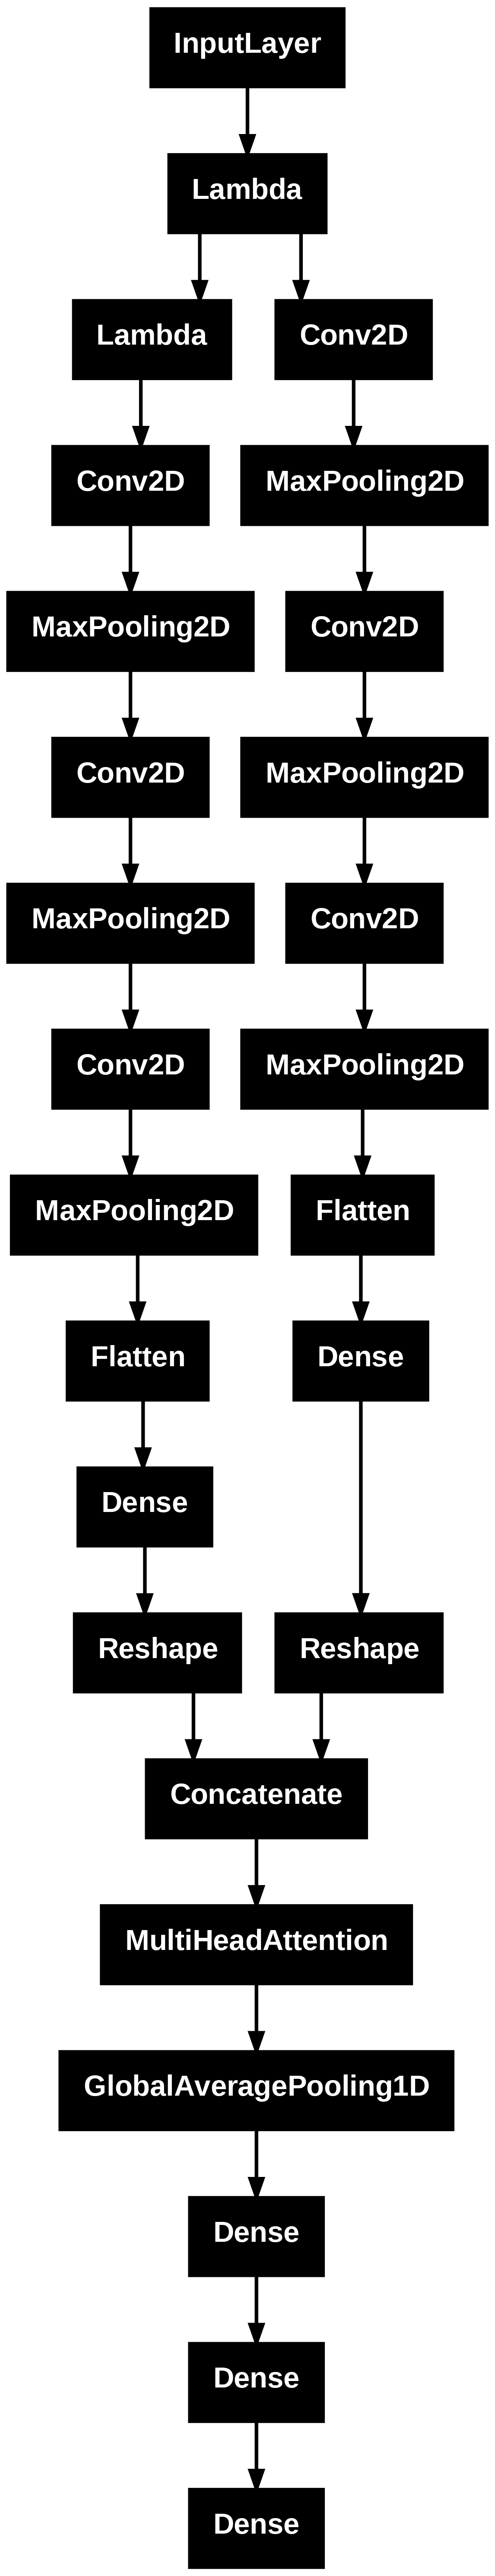

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model.png',  # ✅ fixed path
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    dpi=300
)


In [19]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,
    batch_size=batch_size
)


Epoch 1/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8789 - loss: 0.2607 - val_accuracy: 0.9808 - val_loss: 0.0552
Epoch 2/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.9831 - loss: 0.0481 - val_accuracy: 0.9720 - val_loss: 0.1214
Epoch 3/3
679/679 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9858 - loss: 0.0510 - val_accuracy: 0.9926 - val_loss: 0.0258


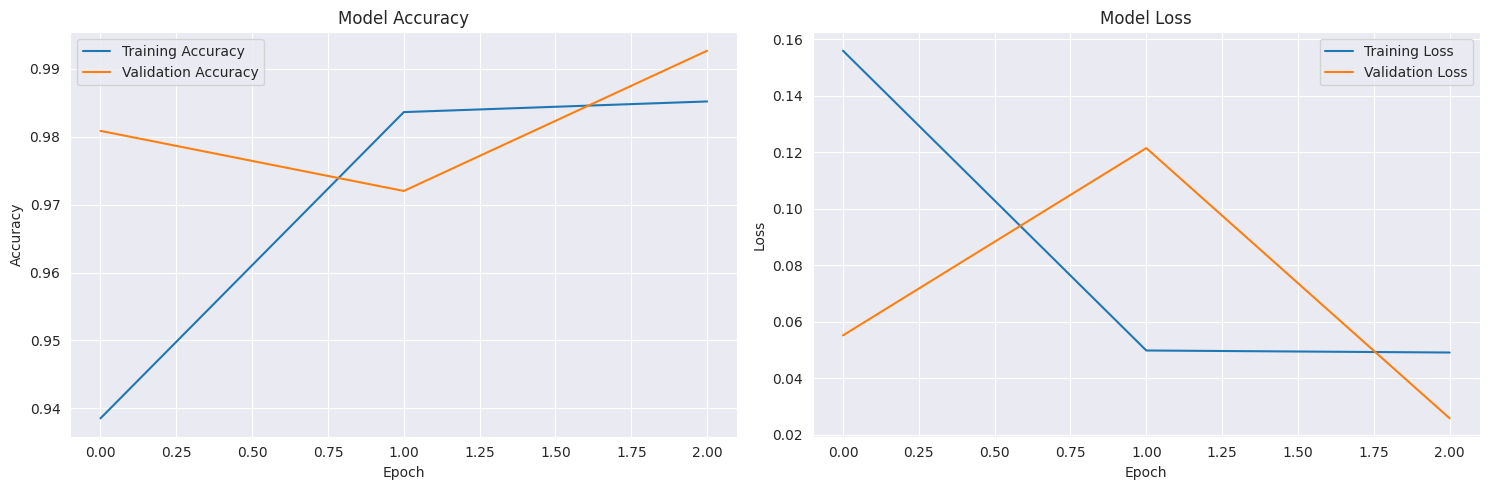

In [20]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# ✅ Call this after training
plot_training_history(history)


In [21]:
test_loss, test_accuracy = model.evaluate(test_gen_new)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9964 - loss: 0.0114
Test Accuracy: 0.9934, Test Loss: 0.0172


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step


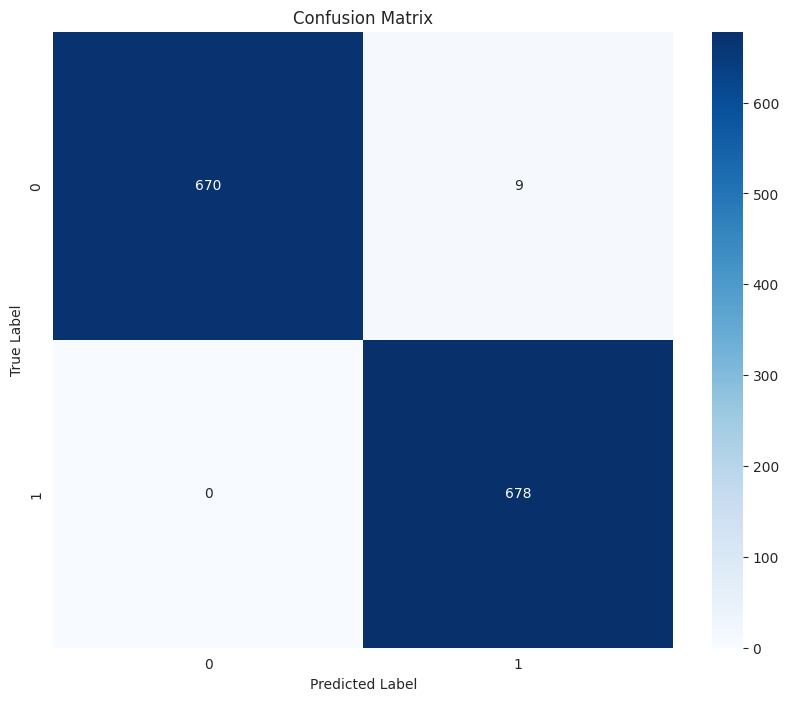

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       679
           1       0.99      1.00      0.99       678

    accuracy                           0.99      1357
   macro avg       0.99      0.99      0.99      1357
weighted avg       0.99      0.99      0.99      1357



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make sure generator is reset before prediction
test_gen_new.reset()

# Predict class probabilities
y_pred_probs = model.predict(test_gen_new, verbose=1)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_gen_new.classes

# Class names
class_names = list(test_gen_new.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [23]:
y_pred_classes = (y_pred_probs > 0.5).astype(int).reshape(-1)


In [24]:
plt.savefig("confusion_matrix.png", dpi=300)


<Figure size 640x480 with 0 Axes>